In [1]:
 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

i=complex(0,1)

In [2]:
t=100
Beta=np.array([[-t,0],[0,t]],dtype=np.complex_)

I_2=np.array([[1,0],[0,1]],dtype=np.complex_)
    
N=15


In [3]:
sigma_z=np.array([[1,0],[0,-1]])

In [4]:
Delta=1
mu=30
eta=0.01
T=0.001         

In [5]:
A=np.array([[2,0],[0,-2]])
B=np.array([[0,-i],[i,0]])
print(A*5)

[[ 10   0]
 [  0 -10]]


In [24]:
def greens_function_E(E=0,phi=0,Delta=1,mu=30,eta=0.01,N=15,U_o=0):
    
    Alpha_R=np.array([[2*t-mu,Delta],[Delta,-2*t+mu]],dtype=np.complex_)
    Alpha_L=np.array([[2*t-mu,Delta*np.exp(i*phi)],[Delta*np.exp(-i*phi),-2*t+mu]],dtype=np.complex_)
    
    H = np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    I_N=np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    for k in range(0,N):
        for l in range(0,N):
            if(k==l):
                H[2*k][2*l]= 2*t-mu
                H[2*k+1][2*l+1]= -2*t+mu
            if(l==k+1 or k==l+1):
                H[2*k][2*l]= -t
                H[2*k+1][2*l+1]= t
                

        
    for k in range(0,2*N):
        I_N[k][k]=1
    
   
    g_R=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_R_prev=g_R
    g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                           np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))
    
    g_L=np.array([[0,0],[0,0]],dtype=np.complex_)
    g_L_prev=g_L
    g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                           np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))
    
    
    while(trace_dist(g_R,g_R_prev)>10**-10):
        g_R_prev=g_R
        g_R=np.linalg.inv((E+i*eta)*I_2 - Alpha_R -\
                            np.matmul(np.matmul( np.transpose(np.conjugate(Beta)),g_R_prev),Beta))  
    while(trace_dist(g_L,g_L_prev)>10**-10):
        g_L_prev=g_L
        g_L=np.linalg.inv((E+i*eta)*I_2 - Alpha_L -\
                            np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L_prev),Beta))

        
    Sigma_R= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_R),Beta)
    Sigma_L= np.matmul(np.matmul(np.transpose(np.conjugate(Beta)),g_L),Beta)
    
    Sigma_R_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_R_N[0][0],Sigma_R_N[0][1],Sigma_R_N[1][0],Sigma_R_N[1][1]=\
                          Sigma_R[0,0],Sigma_R[0,1],Sigma_R[1,0],Sigma_R[1,1]
    
    Sigma_L_N =np.zeros(shape=(2*N,2*N),dtype=np.complex_) 
    Sigma_L_N[2*N-2][2*N-2],Sigma_L_N[2*N-2][2*N-1],Sigma_L_N[2*N-1][2*N-2],Sigma_L_N[2*N-1][2*N-1]=\
                          Sigma_L[0,0],Sigma_L[0,1],Sigma_L[1,0],Sigma_L[1,1]
    
    Sigma_N = Sigma_R_N + Sigma_L_N
                          
    #print((E+i*eta)*I_N - H- Sigma_N)
    g_normal = np.linalg.inv((E+i*eta)*I_N - H - Sigma_N)
    #print("g_normal",isHerm(g_normal))
    #print(g_normal)
    
   # Sigma_IN =i*(Sigma_N -np.transpose(np.conjugate(Sigma_N)))
    
    
    #G_n = np.matmul(np.matmul(g_normal,Sigma_IN),np.transpose(np.conjugate(g_normal)))
    
    
    
    #print("G_n ", isHerm(G_n*H_N))
    Current= np.matmul(np.transpose(np.conjugate(g_normal)),np.transpose(np.conjugate(Sigma_R_N)))\
                               - np.matmul( g_normal,Sigma_R_N)
    #print(H_N*G_n==G_n*H_N)
    current_I =0
    
    for k in range(0,N):
        current_I+= Current[2*k][2*k]-Current[2*k+1][2*k+1]    
    
                          
    DOS=i*np.trace(g_normal-np.transpose(np.conjugate(g_normal)))  
    #print(DOS)
    
    
    
    return g_normal, current_I,DOS
        

In [25]:
import matplotlib.pyplot as plt

In [26]:
def trace_dist(A,B):
    C=A-B
    return  np.trace(np.matmul(C,np.transpose(np.conjugate(C))) )

In [29]:
phi_range=np.linspace(0,2*np.pi,50)
E_range=np.linspace(-1,1,50)
T_range=[10**-3,1,3,5,10]
Currents=np.zeros(shape=(len(T_range),len(phi_range)),dtype=np.complex_)
for x in range(0,len(T_range)):
    
    Current_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)
    #DOS_range=np.zeros(shape=(len(phi_range),len(E_range)),dtype=np.complex_)
    for l in range(0,len(phi_range)):
        for k in range(0,len(E_range)):
            _,Current_range[l,k],_ = greens_function_E(E=E_range[k],phi=phi_range[l],N=15,U_o=0)
   
    for l in range(0,len(phi_range)):
        for k in range(0,len(E_range)):
            Currents[x][l]+=Current_range[l][k]*fermi(E_range[k],0,T_range[x])
        
    
    #print(DOS_range[l])
    

C:\Users\REET\AppData\Local\Temp/ipykernel_11852/531731732.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp((E-mu)/T)+1)


In [ ]:
def fermi(E,mu,T):
     return 1/(np.exp((E-mu)/T)+1)

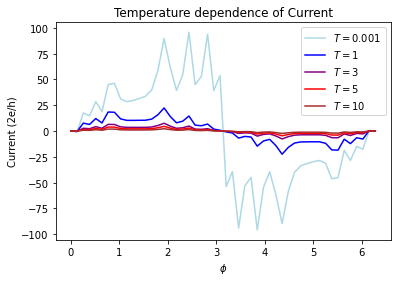

In [33]:
colors=['lightblue','blue','purple','red','brown']
for x in range(0,len(T_range)):
    plt.plot(phi_range,np.real(Currents[x]),c=colors[x],label=f"$T={T_range[x]}$")
plt.xlabel("$\phi$")
plt.ylabel("Current (2e/h)")
plt.title("Temperature dependence of Current")
plt.legend()


In [105]:
T_r=np.divide(1,np.add(1,np.divide(U_o_range,2*t)))

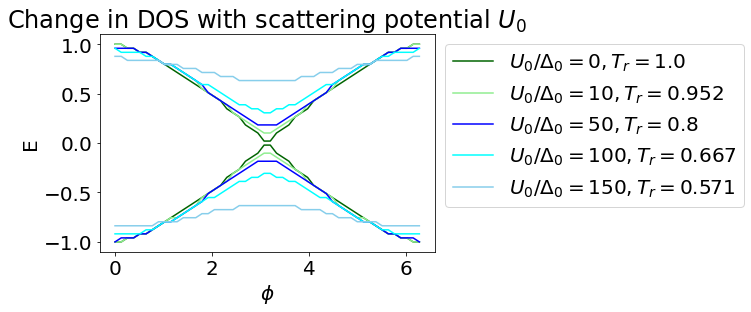

In [108]:
max_1=np.zeros_like(max_index_1_act,dtype=int)
max_2=np.zeros_like(max_index_2_act,dtype=int)
for x in range(0,len(U_o_range)):
    for j in range(0,len(max_index_1_act[x])):
        max_1[x][j]= int(max_index_1_act[x][j])
        max_2[x][j]=int(max_index_2_act[x][j])           

colors=['darkgreen','lightgreen','blue','cyan','skyblue']
for x in range(0,len(U_o_range)):
    
    plt.plot(phi_range,E_range[max_1[x]],c=colors[x],label=f"$U_{0}/\Delta_{0}={U_o_range[x]}, T_r ={np.round(T_r[x],3)}$")
    plt.plot(phi_range,E_range[max_2[x]],c=colors[x])
plt.xlabel("$\phi$")
plt.ylabel("E")
plt.title("Change in DOS with scattering potential $U_{0}$")
plt.legend(bbox_to_anchor=(1,1))

In [65]:
print(max_index_1_act[x])

[ 0.  0.  1.  2.  2.  3.  4.  5.  6.  8.  9. 10. 10. 10.  9.  8.  6.  5.
  4.  3.  2.  2.  1.  0.  0.]


In [72]:
print(temp)

[ 0.  0.  1.  2.  2.  3.  4.  5.  6.  8.  9. 10. 10. 10.  9.  8.  6.  5.
  4.  3.  2.  2.  1.  0.  0.]


In [57]:
print(max_index_2)

[12, 12, 11, 10, 10, 9, 8, 7, 6, 4, 3, 2, 2, 2, 3, 4, 6, 7, 8, 9, 10, 10, 11, 12, 12]


In [58]:
DOS_range_prime=np.real((np.reshape(DOS_range,(len(phi_range),len(E_range)))))





AttributeError: 'function' object has no attribute 'help'

In [59]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

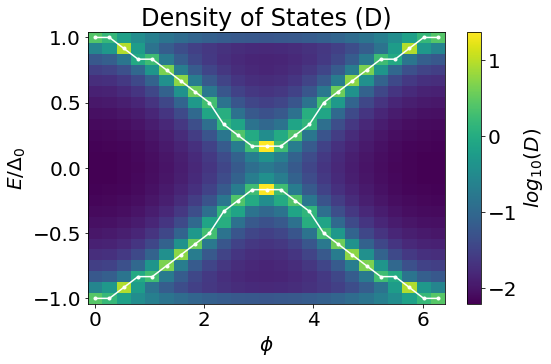

In [60]:
cmap = plt.get_cmap('viridis',len(DOS_range_prime.flatten()))
figure(figsize = (8,5 ))
px = plt.pcolormesh(phi_range,E_range,np.log10(np.real(np.transpose(DOS_range_prime))))
plt.ylabel(r"$E/\Delta_{0}$")
plt.xlabel(r"$ \phi $")
plt.title("Density of States (D)")
#plt.plot(phi_range,E_range,'w--',markersize='20')
norm = mpl.colors.Normalize(vmin=min((np.log10(DOS_range_prime.flatten()))), \
                            vmax=max((np.log10(DOS_range_prime.flatten())))) 
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.plot(phi_range,E_range[max_index_1_act],marker='.',c='white')
plt.plot(phi_range,E_range[max_index_2_act],marker='.',c='white')
plt.colorbar(sm,label="$log_{10} (D )$")
plt.show()




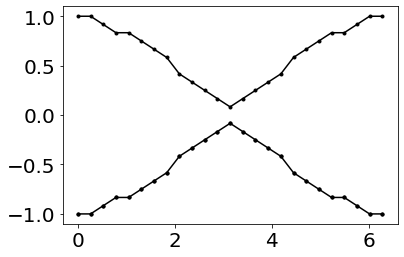

In [52]:


plt.plot(phi_range,E_range[max_index_1_act],marker='.',c='k')
plt.plot(phi_range,E_range[max_index_2_act],marker='.',c='k')

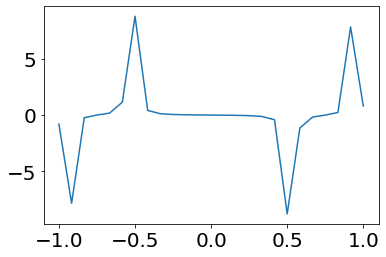

In [19]:
plt.plot(E_range,np.real(Current_range[4][:]))

In [12]:
T=10**-12
currents_phi=np.zeros(shape=(len(phi_range)),dtype=np.complex_)

for l in range(0,len(phi_range)):
    for k in range(0,len(E_range)):
        currents_phi[l]+= Current_range[l][k]* fermi(E_range[k],mu,T)
    

NameError: name 'Current_range' is not defined

In [13]:
def fermi(E,mu,T):
     return 1/(np.exp((E-mu)/T)+1)

In [32]:
currents_phi[24]

(nan+nanj)

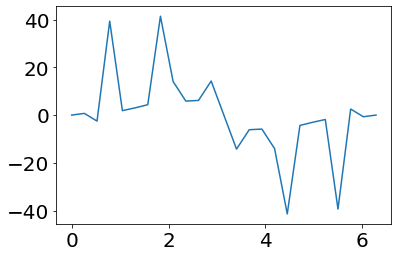

In [37]:
plt.plot(phi_range,np.real(currents_phi))


In [624]:
#rough

C:\Users\REET\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


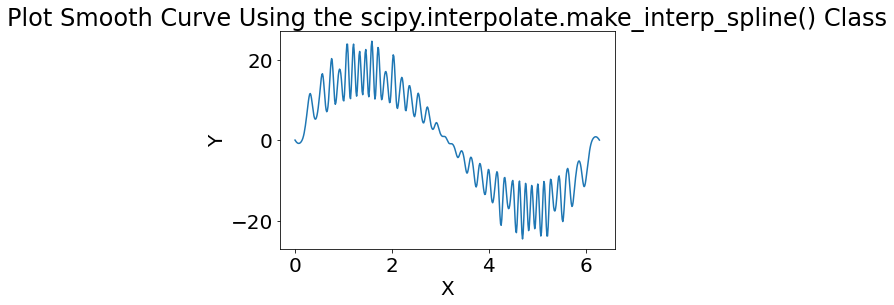

In [623]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
 
X_Y_Spline = make_interp_spline(phi_range, currents_phi)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(phi_range.min(), phi_range.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()